In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load the dataset
df=pd.read_csv('world_population.csv')
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
#inspect the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [4]:
df.Country.duplicated().any()

False

In [5]:
df.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [6]:
#get some basic statistical information on the dataset
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [7]:
#Create a new dataframe grouping the countries by continent
df2=df.groupby("Continent")[["Area (km²)","2022 Population",'1970 Population',"World Population Percentage"]].sum()

In [8]:
#Calculate the total area 
total_area=df2["Area (km²)"].sum()

In [9]:
#Calculate the Percentage of the world's area occupied by each continent
df2["World Area Percentage"]=df2["Area (km²)"]/total_area*100

In [10]:
#Calculate the Population density of each country
df2["Density (per km²)"]=df2["2022 Population"]/df2["Area (km²)"]

In [11]:
df2=df2.reset_index()
df2

,Continent,Area (km²),2022 Population,1970 Population,World Population Percentage,World Area Percentage,Density (per km²)
0,Africa,30317963,1426730932,365444348,17.87,22.282927,47.058931
1,Asia,32138141,4721383274,2144906290,59.19,23.620712,146.909035
2,Europe,23010411,743147538,655923991,9.33,16.912064,32.296144
3,North America,24244178,600296136,315434606,7.51,17.818851,24.760424
4,Oceania,8515081,45038554,19480270,0.55,6.258367,5.289269
5,South America,17833382,436816608,192947156,5.48,13.107080,24.494322


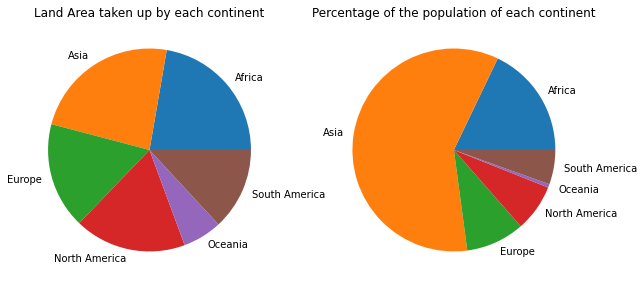

In [12]:
plt.figure(figsize=(10,30))
plt.subplot(1,2,1)
plt.pie(df2['World Area Percentage'], labels = df2['Continent'])
plt.title("Land Area taken up by each continent");

plt.subplot(1,2,2)
plt.pie(df2['World Population Percentage'], labels = df2['Continent'])
plt.title("Percentage of the population of each continent");

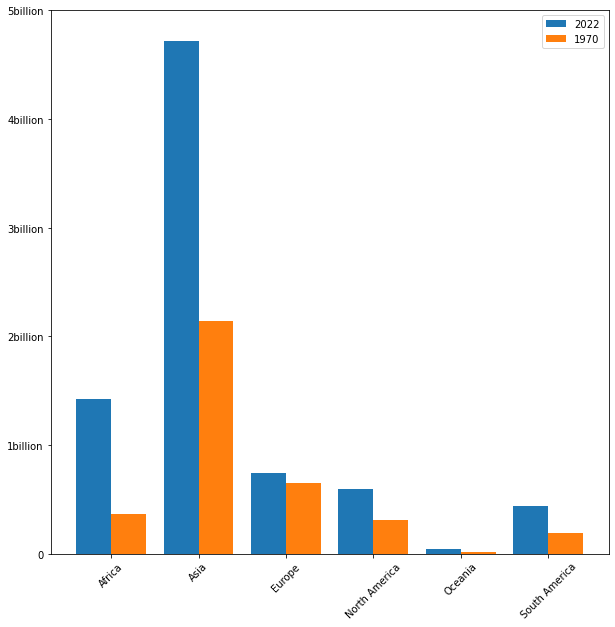

In [13]:
import numpy as np
populationcnt = ["0",'1billion','2billion','3billion','4billion','5billion']
plt.figure(figsize=(10,10))
X_axis = np.arange(len(df2))
plt.bar(X_axis - 0.2, df2["2022 Population"], 0.4, label = '2022')
plt.bar(X_axis + 0.2, df2["1970 Population"], 0.4, label = '1970')
plt.xticks(X_axis,list(df2["Continent"]),rotation=45)
plt.yticks(np.arange(0,5000000001,1000000000),populationcnt)
plt.legend();